# Write annotation.json to .txt for mmseg

In [16]:
import json

with open("/home/s/tuyenld/endoscopy/public_dataset.json") as f:
    data = json.load(f)

# Write to txt
data = data["train"]["images"]
data_new = []

for d in data:
    data_new.append(d.split("/")[-1].split(".")[0])

with open("../data/train_public_dataset.txt", "w+") as f:
    for d in data_new:
        f.write(d + "\n")

# Test Dataset, Dataloader, Data Preprocessor, Inferencer

### Test BGR to RGB

In [51]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

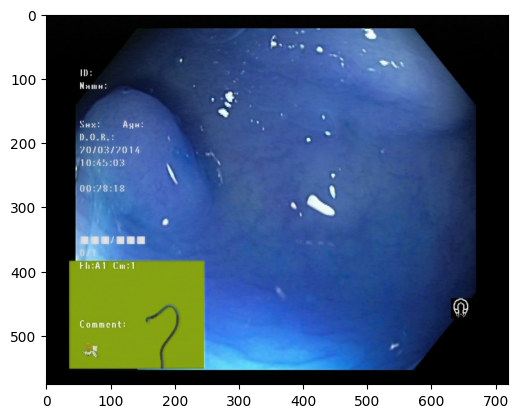

In [3]:
img = cv2.imread("/home/s/tuyenld/DATA/public_dataset/TrainDataset/image/cjyzu9th0qt4r0a46pyl4zik0.png")
plt.imshow(img)

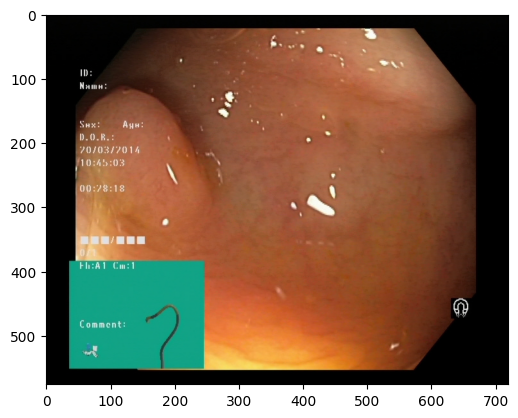

In [4]:
img_cv2_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cv2_rgb)

### Test PIL Image

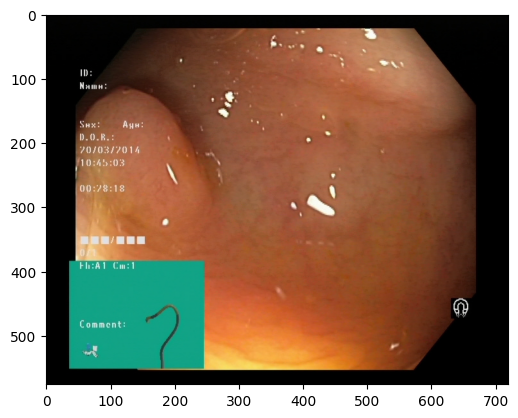

In [23]:
img = Image.open("/home/s/tuyenld/DATA/public_dataset/TrainDataset/image/cjyzu9th0qt4r0a46pyl4zik0.png")
plt.imshow(img)

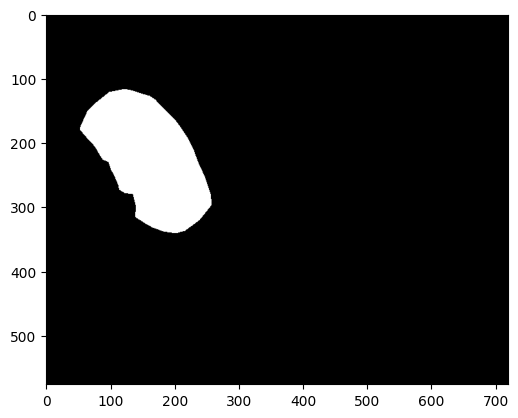

In [4]:
img = Image.open("/home/s/tuyenld/DATA/public_dataset/TrainDataset/masks/cjyzu9th0qt4r0a46pyl4zik0.png")
plt.imshow(img)

In [5]:
img_np = np.array(img)

In [6]:
img_np.shape

(576, 720)

In [8]:
img_np

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

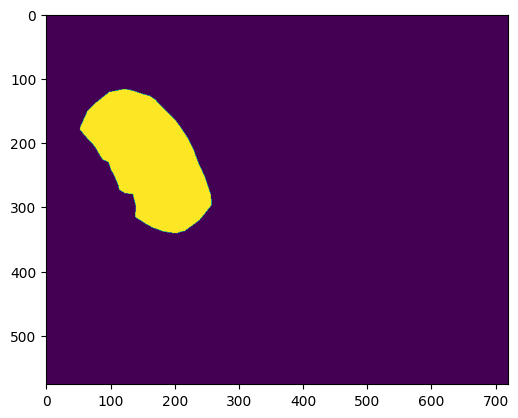

In [9]:
plt.imshow(img_np)

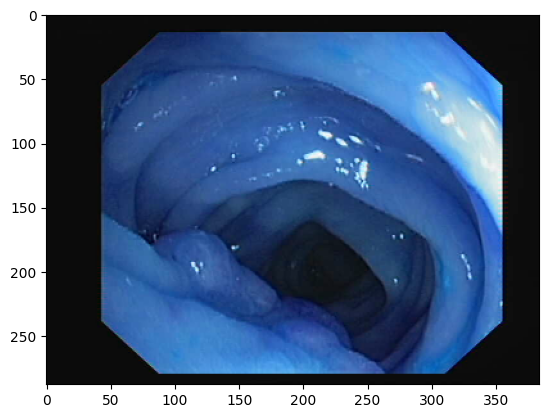

In [53]:
img = cv2.imread("/home/s/tuyenld/DATA/public_dataset/TrainDataset/image/1.png")
plt.imshow(img)

### Test DataLoader, Data Preprocessor

In [2]:
from mmseg_custom.datasets.public_dataset import PublicDataset
from mmseg.models import SegDataPreProcessor
from mmengine.registry import init_default_scope
init_default_scope('mmseg')

train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', scale=(512, 512), keep_ratio=False),
    # dict(type='PhotoMetricDistortion'),
    # dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(512, 512), keep_ratio=False),
    dict(type='LoadAnnotations', reduce_zero_label=False),
    dict(type='PackSegInputs')
]

train_dataset = PublicDataset(
                        # ann_file="../data/train_public_dataset.txt",
                    data_prefix=dict(
                        img_path="/home/s/tuyenld/DATA/public_dataset/TrainDataset/image", 
                        seg_map_path="/home/s/tuyenld/DATA/public_dataset/TrainDataset/masks"
                    ),
                    pipeline=train_pipeline
                )

test_dataset = PublicDataset(
                # ann_file="../data/test_CVC-ClinicDB.txt",
                    data_prefix=dict(
                        img_path='/home/s/tuyenld/DATA/public_dataset/TestDataset/CVC-ClinicDB/images',
                        seg_map_path='/home/s/tuyenld/DATA/public_dataset/TestDataset/CVC-ClinicDB/masks'
                    ),
                    pipeline=test_pipeline
                )

data_preprocessor = SegDataPreProcessor(
    # mean=[123.675, 116.28, 103.53],
    # std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    # rgb_to_bgr=True,
    size=(512,512)
)

/mnt/.conda/envs/openmmlab/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.8 (you have 1.4.7). Upgrade using: pip install --upgrade albumentations
/mnt/.conda/envs/openmmlab/lib/python3.10/site-packages/mmseg/datasets/transforms/loading.py:83: UserWarning: `reduce_zero_label` will be deprecated, if you would like to ignore the zero label, please set `reduce_zero_label=True` when dataset initialized
  warnings.warn('`reduce_zero_label` will be deprecated, '


#### Test Dataset

In [9]:
print(train_dataset.get_data_info(0))
print(test_dataset.get_data_info(1))

{'img_path': '/home/s/tuyenld/DATA/public_dataset/TrainDataset/image/1.png', 'seg_map_path': '/home/s/tuyenld/DATA/public_dataset/TrainDataset/masks/1.png', 'label_map': None, 'reduce_zero_label': False, 'seg_fields': [], 'sample_idx': 0}
{'img_path': '/home/s/tuyenld/DATA/public_dataset/TestDataset/CVC-ClinicDB/images/106.png', 'seg_map_path': '/home/s/tuyenld/DATA/public_dataset/TestDataset/CVC-ClinicDB/masks/106.png', 'label_map': None, 'reduce_zero_label': False, 'seg_fields': [], 'sample_idx': 1}


In [50]:
train_dataset[0]

{'inputs': tensor([[[11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          ...,
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11]],
 
         [[11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          ...,
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11]],
 
         [[11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          ...,
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11]]], dtype=torch.uint8),
 'data_samples': <SegDataSample(
 
     META INFORMATION
     img_path: '/home/s/tuyenld/DATA/public_dataset/TrainDataset/image/1.png'
     reduce_zero_label: Fa

In [43]:
train_dataset[0]["inputs"].shape

torch.Size([3, 271, 361])

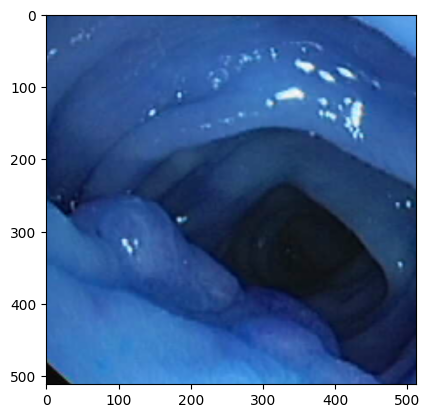

In [58]:
plt.imshow(train_dataset[0]["inputs"].permute(1,2,0))

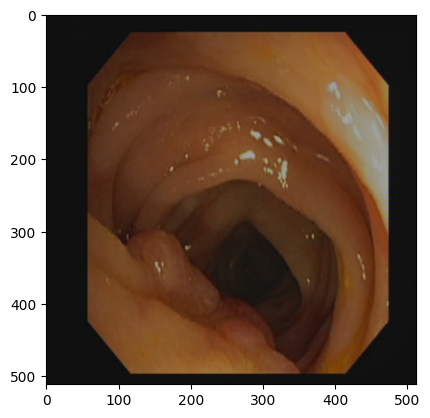

In [16]:
img_rgb = cv2.cvtColor(train_dataset[0]["inputs"].permute(1,2,0).numpy(), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [66]:
gt = train_dataset[0]["data_samples"].gt_sem_seg.data

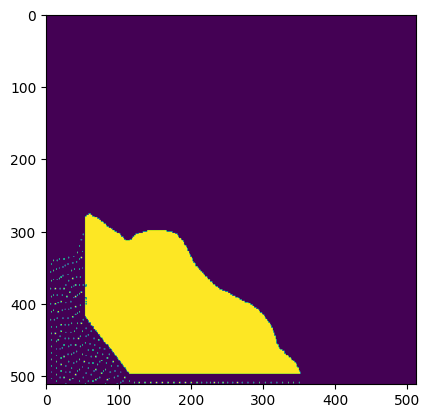

In [67]:
gt = gt.squeeze(0)
plt.imshow(gt)

In [68]:
gt.shape

torch.Size([512, 512])

In [69]:
gt[400, 500]

tensor(0)

In [17]:
test_dataset[1]

{'inputs': tensor([[[11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          ...,
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11]],
 
         [[11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          ...,
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11]],
 
         [[11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          ...,
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11],
          [11, 11, 11,  ..., 11, 11, 11]]], dtype=torch.uint8),
 'data_samples': <SegDataSample(
 
     META INFORMATION
     ori_shape: (288, 384)
     img_path: '/home/s/tuyenld/DATA/public_dataset/TestDataset/CVC-ClinicDB/

In [18]:
test_dataset[1]["inputs"].shape

torch.Size([3, 512, 512])

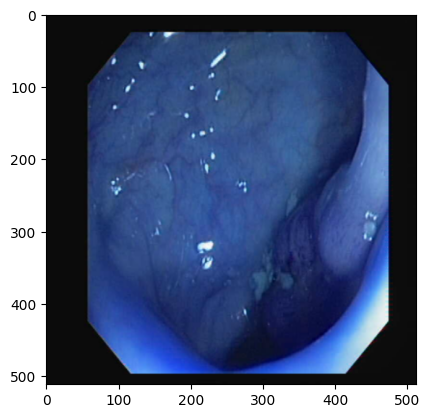

In [19]:
import matplotlib.pyplot as plt
plt.imshow(test_dataset[1]["inputs"].permute(1,2,0))

In [20]:
gt = test_dataset[1]["data_samples"].gt_sem_seg.data

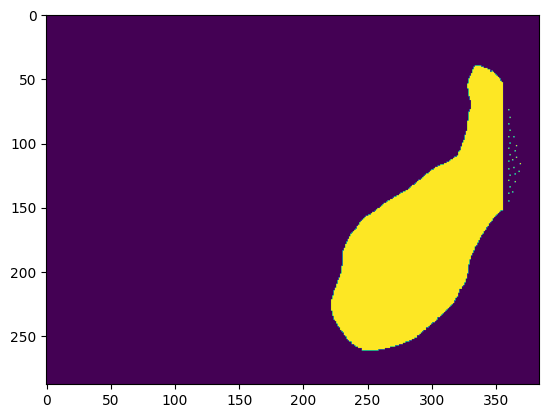

In [21]:
gt = gt.squeeze(0)
plt.imshow(gt)

In [27]:
gt.shape

torch.Size([512, 512])

In [85]:
import torch
# label = torch.load("label.pth").cpu()
# pred_label = torch.load("pred_label.pth").cpu()
# mask = torch.load("mask.pth").cpu()
# target = torch.load("target.pth").cpu()
# mask.shape, target.shape
valid_mask = torch.load("valid_mask.pth").cpu()
valid_mask.shape

torch.Size([2, 1, 512, 512])

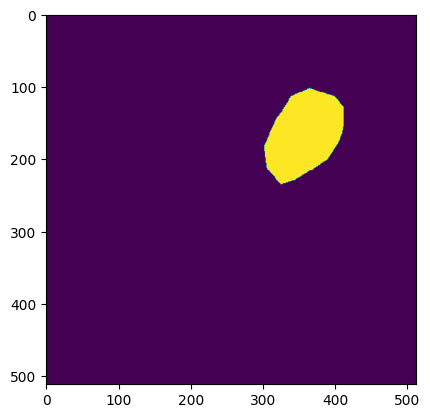

In [88]:
import matplotlib.pyplot as plt

plt.imshow(valid_mask[1].squeeze(0))

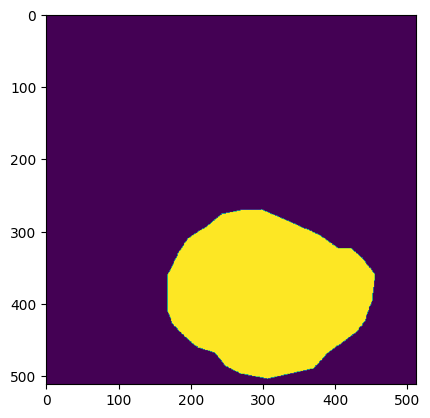

In [79]:
import matplotlib.pyplot as plt

plt.imshow(target[1].squeeze(0))

#### Data Preprocessor

In [45]:
data_procceed = data_preprocessor(train_dataset[0])

In [46]:
data_procceed

{'inputs': tensor([[[11., 11., 11.,  ..., 11., 11., 11.],
          [11., 11., 11.,  ..., 11., 11., 11.],
          [11., 11., 11.,  ..., 11., 11., 11.],
          ...,
          [11., 11., 11.,  ..., 11., 11., 11.],
          [11., 11., 11.,  ..., 11., 11., 11.],
          [11., 11., 11.,  ..., 11., 11., 11.]],
 
         [[11., 11., 11.,  ..., 11., 11., 11.],
          [11., 11., 11.,  ..., 11., 11., 11.],
          [11., 11., 11.,  ..., 11., 11., 11.],
          ...,
          [11., 11., 11.,  ..., 11., 11., 11.],
          [11., 11., 11.,  ..., 11., 11., 11.],
          [11., 11., 11.,  ..., 11., 11., 11.]],
 
         [[11., 11., 11.,  ..., 11., 11., 11.],
          [11., 11., 11.,  ..., 11., 11., 11.],
          [11., 11., 11.,  ..., 11., 11., 11.],
          ...,
          [11., 11., 11.,  ..., 11., 11., 11.],
          [11., 11., 11.,  ..., 11., 11., 11.],
          [11., 11., 11.,  ..., 11., 11., 11.]]]),
 'data_samples': <SegDataSample(
 
     META INFORMATION
     img_path: 

In [47]:
data_procceed["inputs"]

tensor([[[11., 11., 11.,  ..., 11., 11., 11.],
         [11., 11., 11.,  ..., 11., 11., 11.],
         [11., 11., 11.,  ..., 11., 11., 11.],
         ...,
         [11., 11., 11.,  ..., 11., 11., 11.],
         [11., 11., 11.,  ..., 11., 11., 11.],
         [11., 11., 11.,  ..., 11., 11., 11.]],

        [[11., 11., 11.,  ..., 11., 11., 11.],
         [11., 11., 11.,  ..., 11., 11., 11.],
         [11., 11., 11.,  ..., 11., 11., 11.],
         ...,
         [11., 11., 11.,  ..., 11., 11., 11.],
         [11., 11., 11.,  ..., 11., 11., 11.],
         [11., 11., 11.,  ..., 11., 11., 11.]],

        [[11., 11., 11.,  ..., 11., 11., 11.],
         [11., 11., 11.,  ..., 11., 11., 11.],
         [11., 11., 11.,  ..., 11., 11., 11.],
         ...,
         [11., 11., 11.,  ..., 11., 11., 11.],
         [11., 11., 11.,  ..., 11., 11., 11.],
         [11., 11., 11.,  ..., 11., 11., 11.]]])

In [48]:
data_procceed["inputs"].shape

torch.Size([3, 620, 827])

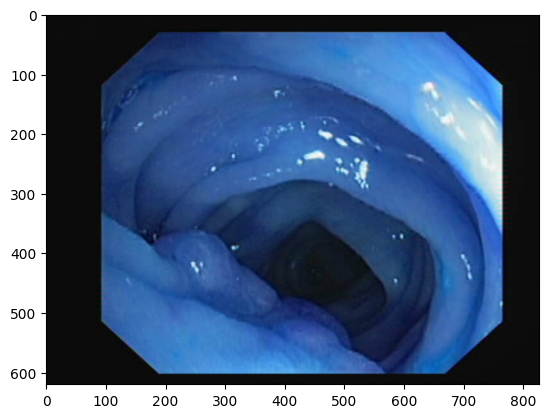

In [49]:
import matplotlib.pyplot as plt
plt.imshow(data_procceed["inputs"].int().permute((1, 2, 0)))

### Test Inferencer

In [2]:
test_dataset.get_data_info(17)

{'img_path': '/home/s/tuyenld/DATA/public_dataset/TestDataset/CVC-ClinicDB/images/25.png',
 'seg_map_path': '/home/s/tuyenld/DATA/public_dataset/TestDataset/CVC-ClinicDB/masks/25.png',
 'label_map': None,
 'reduce_zero_label': False,
 'seg_fields': [],
 'sample_idx': 17}

In [3]:
from mmseg.apis import init_model, inference_model, show_result_pyplot

config = "configs/mae/mae-base_upernet_8xb2-amp-40k_publicdataset-512x512.py"
ckpt = "/home/s/tuyenld/mae/downstream/segmentation/work_dirs/mae-base_upernet_8xb2-amp-40k_publicdataset-512x512_exp7/iter_24000.pth"
# img_path = "/home/s/tuyenld/DATA/public_dataset/TestDataset/CVC-ClinicDB/images/25.png"
img_path = test_dataset.get_data_info(17)["img_path"]

model = init_model(config, ckpt, device='cuda:0')
result = inference_model(model, img_path)
result.gt_sem_seg = test_dataset[17]["data_samples"].gt_sem_seg

/mnt/.conda/envs/openmmlab/lib/python3.10/site-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '


Loads checkpoint by local backend from path: /home/s/tuyenld/mae/downstream/segmentation/work_dirs/mae-base_upernet_8xb2-amp-40k_publicdataset-512x512_exp7/iter_24000.pth


In [1]:
print(len(test_dataset))

NameError: name 'test_dataset' is not defined

In [4]:
model.dataset_meta

{'classes': ('Background', 'Polyp'),
 'palette': [[0, 0, 0], [255, 255, 255]],
 'label_map': None,
 'reduce_zero_label': False}

In [25]:
vis_image = show_result_pyplot(model, img_path, result, show=False, save_dir='infer')

In [8]:
result.keys()

['seg_logits', 'pred_sem_seg']

In [5]:
result.pred_sem_seg.data.shape

torch.Size([1, 288, 384])

In [8]:
pred_label = result.pred_sem_seg.data.cpu().squeeze()
label = result.gt_sem_seg.data.cpu().squeeze()

In [23]:
import torch

intersect = pred_label[pred_label == label]
area_intersect = torch.histc(
    intersect.float(), bins=2, min=0,
    max=1).cpu()
area_pred_label = torch.histc(
    pred_label.float(), bins=2, min=0,
    max=1).cpu()
area_label = torch.histc(
    label.float(), bins=2, min=0,
    max=1).cpu()
area_union = area_pred_label + area_label - area_intersect

In [24]:
intersect.sum(), area_intersect, area_union, area_pred_label, area_label

(tensor(41348.),
 tensor([58194., 41348.]),
 tensor([69244., 52398.]),
 tensor([67586., 43006.]),
 tensor([59852., 50740.]))

In [33]:
results = (area_intersect, area_union, area_pred_label, area_label)

results = tuple(zip(*results))
assert len(results) == 4, "False"

AssertionError: False

In [28]:
import numpy as np

true_positives = np.sum(np.round(np.clip(pred_label.numpy() * label.numpy(), 0, 1)))
intersection = true_positives
intersection

41348.0

In [27]:
union = np.sum(pred_label.numpy())+np.sum(label.numpy())-intersection
union

52398.0

In [21]:
predicted_positives = np.sum(np.round(np.clip(pred_label.numpy(), 0, 1)))
predicted_positives

43006.0

In [20]:
possible_positives = np.sum(np.round(np.clip(label.numpy(), 0, 1)))
possible_positives

50740

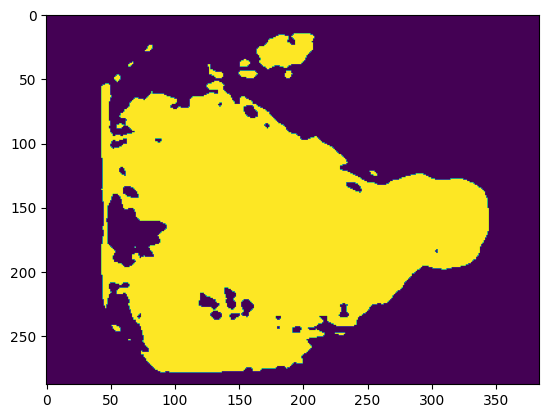

In [7]:
import matplotlib.pyplot as plt

plt.imshow(result.pred_sem_seg.data.cpu().squeeze(0))

In [38]:
result.seg_logits.data.squeeze(0)[60, 170]

tensor(0.0008, device='cuda:0')

### Test Dilation, Erosion, Opening, Closing

In [19]:
test_result = result.pred_sem_seg.data.cpu().squeeze(0).numpy()

In [20]:
test_result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

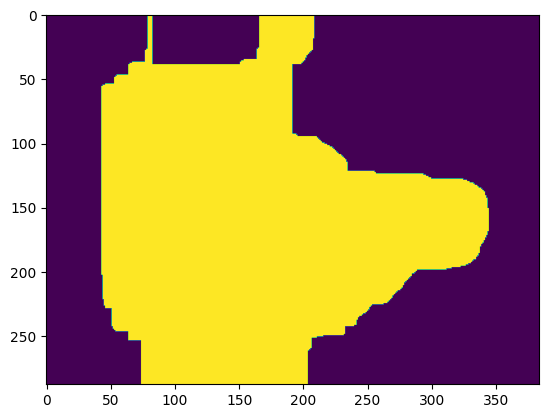

In [33]:
import cv2
import numpy as np

kernel = np.ones((51, 51), np.uint8)
closing = cv2.morphologyEx(test_result, cv2.MORPH_CLOSE, kernel, iterations=1) 
plt.imshow(closing)

# Test Load Net

In [1]:
import torch

In [2]:
state_dict = torch.load("/home/s/tuyenld/mae/downstream/segmentation/mae_pretrain_vit_base.pth")

In [6]:
state_dict['model']["pos_embed"].shape

torch.Size([1, 197, 768])

In [14]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, img_size=224, patch_size=16, embed_dim=768):
        super(Net, self).__init__()
        self.num_patches = (img_size // patch_size) ** 2
        self.pos_embed = nn.Parameter(torch.zeros(1, self.num_patches + 1, embed_dim), requires_grad=False)
    
    def init_weights(self):
        nn.init.normal_(self.pos_embed, std=0.02)

model = Net()
model.init_weights()
model_state_dict = model.state_dict()

In [19]:
model_state_dict

OrderedDict([('pos_embed',
              tensor([[[ 0.0027,  0.0020, -0.0078,  ..., -0.0024,  0.0061,  0.0269],
                       [ 0.0195,  0.0294, -0.0306,  ...,  0.0057,  0.0249,  0.0048],
                       [-0.0045,  0.0152,  0.0027,  ..., -0.0051,  0.0091, -0.0055],
                       ...,
                       [ 0.0013,  0.0225,  0.0038,  ..., -0.0061, -0.0281,  0.0125],
                       [ 0.0329, -0.0486, -0.0034,  ..., -0.0194,  0.0013,  0.0228],
                       [ 0.0301,  0.0041,  0.0108,  ..., -0.0198,  0.0196, -0.0202]]]))])

In [25]:
cls_token_weight = model.pos_embed[:, 0]
pos_embed_weight = model.pos_embed[:, (-1 * 14 * 14):]

In [26]:
cls_token_weight.shape

torch.Size([1, 768])

In [27]:
pos_embed_weight, pos_embed_weight.shape

(tensor([[[ 0.0195,  0.0294, -0.0306,  ...,  0.0057,  0.0249,  0.0048],
          [-0.0045,  0.0152,  0.0027,  ..., -0.0051,  0.0091, -0.0055],
          [ 0.0199, -0.0078,  0.0450,  ..., -0.0317, -0.0146,  0.0066],
          ...,
          [ 0.0013,  0.0225,  0.0038,  ..., -0.0061, -0.0281,  0.0125],
          [ 0.0329, -0.0486, -0.0034,  ..., -0.0194,  0.0013,  0.0228],
          [ 0.0301,  0.0041,  0.0108,  ..., -0.0198,  0.0196, -0.0202]]]),
 torch.Size([1, 196, 768]))

In [29]:
from mmseg.models.utils import resize
pos_embed_weight = pos_embed_weight.reshape(
    1, 14, 14, model.pos_embed.shape[2]).permute(0, 3, 1, 2)
pos_embed_weight = resize(
    pos_embed_weight, size=(32, 32), align_corners=False, mode='bicubic')

In [30]:
pos_embed_weight

tensor([[[[ 0.0246,  0.0175,  0.0019,  ...,  0.0211, -0.0040, -0.0161],
          [ 0.0196,  0.0144,  0.0031,  ...,  0.0228,  0.0004, -0.0105],
          [ 0.0117,  0.0101,  0.0066,  ...,  0.0306,  0.0110,  0.0015],
          ...,
          [ 0.0289,  0.0203,  0.0022,  ...,  0.0131,  0.0149,  0.0158],
          [ 0.0252,  0.0159, -0.0024,  ...,  0.0304,  0.0275,  0.0268],
          [ 0.0246,  0.0145, -0.0045,  ...,  0.0390,  0.0337,  0.0322]],

         [[ 0.0366,  0.0320,  0.0245,  ..., -0.0033,  0.0098,  0.0169],
          [ 0.0230,  0.0219,  0.0212,  ...,  0.0022,  0.0163,  0.0238],
          [-0.0077, -0.0012,  0.0128,  ...,  0.0136,  0.0304,  0.0391],
          ...,
          [-0.0167, -0.0099,  0.0042,  ..., -0.0179,  0.0069,  0.0184],
          [-0.0322, -0.0227, -0.0031,  ..., -0.0314, -0.0016,  0.0117],
          [-0.0400, -0.0292, -0.0070,  ..., -0.0388, -0.0061,  0.0083]],

         [[-0.0371, -0.0287, -0.0152,  ..., -0.0006, -0.0096, -0.0137],
          [-0.0309, -0.0247, -

In [31]:
pos_embed_weight.shape

torch.Size([1, 768, 32, 32])

In [32]:
pos_embed_weight = torch.flatten(pos_embed_weight, 2)

In [33]:
pos_embed_weight.shape

torch.Size([1, 768, 1024])

# Model High Resolution

In [ ]:
model_high_resolution = Net(img_size=512, patch_size=16, embed_dim=768)

In [21]:
model_high_resolution.pos_embed.shape != model.pos_embed.shape

True

In [ ]:
model_high_resolution.load_state_dict(model_state_dict, False)
model_high_resolution_state_dict = model_high_resolution.state_dict()

In [2]:
from mmengine.config import Config

cfg = Config.fromfile('/home/s/tuyenld/mae/downstream/segmentation/configs/mae/mae-base_upernet_8xb2-amp-160k_publicdataset-512x512.py')
print(cfg)

Config (path: /home/s/tuyenld/mae/downstream/segmentation/configs/mae/mae-base_upernet_8xb2-amp-160k_publicdataset-512x512.py): {'norm_cfg': {'type': 'SyncBN', 'requires_grad': True}, 'data_preprocessor': {'type': 'SegDataPreProcessor', 'bgr_to_rgb': True, 'pad_val': 0, 'seg_pad_val': 255, 'size': (512, 512)}, 'model': {'type': 'EncoderDecoder', 'data_preprocessor': {'type': 'SegDataPreProcessor', 'bgr_to_rgb': True, 'pad_val': 0, 'seg_pad_val': 255, 'size': (512, 512)}, 'pretrained': None, 'backbone': {'type': 'MaskedAutoencoderViT', 'img_size': 512, 'patch_size': 16, 'in_channels': 3, 'embed_dims': 768, 'num_layers': 12, 'num_heads': 12, 'mlp_ratio': 4, 'out_indices': [3, 5, 7, 11], 'attn_drop_rate': 0.0, 'drop_path_rate': 0.1, 'norm_cfg': {'type': 'LN', 'eps': 1e-06}, 'act_cfg': {'type': 'GELU'}, 'norm_eval': False, 'init_values': 0.1, 'in_chans': 3, 'embed_dim': 768, 'depth': 12, 'num_register_tokens': 4, 'final_norm': True, 'interpolate_mode': 'bicubic', 'init_cfg': {'type': 'Pret

# Model Info

In [6]:
from mmseg_custom.models.backbones.mae import MaskedAutoencoderViT
from mmengine.analysis import get_model_complexity_info

input_shape = (3, 224, 224)
model = MaskedAutoencoderViT(out_indices=[3, 5, 7, 11])
analysis = get_model_complexity_info(model, input_shape)
analysis

05/24 22:28:04 - mmengine - WARNING - Unsupported operator aten::add encountered 26 time(s)
05/24 22:28:04 - mmengine - WARNING - Unsupported operator aten::scaled_dot_product_attention encountered 12 time(s)
05/24 22:28:04 - mmengine - WARNING - Unsupported operator aten::gelu encountered 12 time(s)
05/24 22:28:04 - mmengine - WARNING - The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python methods. In the latter case they will have zeros for statistics, though their statistics will still contribute to their parent calling module.
blocks.0.attn.attn_drop, blocks.1.attn.attn_drop, blocks.10.attn.attn_drop, blocks.11.attn.attn_drop, blocks.2.attn.attn_drop, blocks.3.attn.attn_drop, blocks.4.attn.attn_drop, blocks.5.attn.attn_drop, blocks.6.attn.attn_drop, blocks.7.attn.attn_drop, blocks.8.attn.attn_drop, blocks.9.attn.attn_drop
05/24 22:28:04 - mmengine - WARNING -

{'flops': 17206767360,
 'flops_str': '17.207G',
 'activations': 16822272,
 'activations_str': '16.822M',
 'params': 85801728,
 'params_str': '85.802M',
 'out_table': '\n+---------------------------+----------------------+-----------+--------------+\n|\x1b \x1b\x1bmodule                   \x1b\x1b \x1b|\x1b \x1b\x1b#parameters or shape\x1b\x1b \x1b|\x1b \x1b\x1b#flops   \x1b\x1b \x1b|\x1b \x1b\x1b#activations\x1b\x1b \x1b|\n+---------------------------+----------------------+-----------+--------------+\n| model                     | 85.802M              | 17.207G   | 16.822M      |\n|  cls_token                |  (1, 1, 768)         |           |              |\n|  pos_embed                |  (1, 197, 768)       |           |              |\n|  register_tokens          |  (1, 4, 768)         |           |              |\n|  patch_embed.proj         |  0.591M              |  0.116G   |  0.151M      |\n|   patch_embed.proj.weight |   (768, 3, 16, 16)   |           |              |\n|   pa

In [7]:
print(analysis["out_table"])


+---------------------------+----------------------+-----------+--------------+
| module                    | #parameters or shape | #flops    | #activations |
+---------------------------+----------------------+-----------+--------------+
| model                     | 85.802M              | 17.207G   | 16.822M      |
|  cls_token                |  (1, 1, 768)         |           |              |
|  pos_embed                |  (1, 197, 768)       |           |              |
|  register_tokens          |  (1, 4, 768)         |           |              |
|  patch_embed.proj         |  0.591M              |  0.116G   |  0.151M      |
|   patch_embed.proj.weight |   (768, 3, 16, 16)   |           |              |
|   patch_embed.proj.bias   |   (768,)             |           |              |
|  blocks                   |  85.054M             |  17.09G   |  16.672M     |
|   blocks.0                |   7.088M             |   1.424G  |   1.389M     |
|    blocks.0.norm1         |    1.536K

In [9]:
print(analysis["out_arch"])


N/A indicates a possibly missing statistic due to how the module was called. Missing values are still included in the parent's total.
MaskedAutoencoderViT(
  #params: 85.8M, #flops: 17.21G, #acts: 16.82M
  (patch_embed): PatchEmbed(
    #params: 0.59M, #flops: 0.12G, #acts: 0.15M
    (proj): Conv2d(
      3, 768, kernel_size=(16, 16), stride=(16, 16)
      #params: 0.59M, #flops: 0.12G, #acts: 0.15M
    )
    (norm): Identity(#params: 0, #flops: N/A, #acts: N/A)
  )
  (blocks): ModuleList(
    #params: 85.05M, #flops: 17.09G, #acts: 16.67M
    (0): Block(
      #params: 7.09M, #flops: 1.42G, #acts: 1.39M
      (norm1): LayerNorm(
        (768,), eps=1e-05, elementwise_affine=True
        #params: 1.54K, #flops: 0.77M, #acts: 0
      )
      (attn): Attention(
        #params: 2.36M, #flops: 0.47G, #acts: 0.62M
        (qkv): Linear(
          in_features=768, out_features=2304, bias=True
          #params: 1.77M, #flops: 0.36G, #acts: 0.46M
        )
        (q_norm): Identity(#params

# Test

In [1]:
# import mmseg_custom
from mmseg.registry import MODELS, DATASETS

In [2]:
print(MODELS.module_dict)
print(DATASETS.module_dict)

{}
{}


In [19]:
from mmengine.config import Config

config = Config.fromfile("/home/s/tuyenld/mae/downstream/segmentation/configs/mae/mae-base_upernet_8xb2-amp-160k_publicdataset-512x512.py")

In [20]:
config

Config (path: /home/s/tuyenld/mae/downstream/segmentation/configs/mae/mae-base_upernet_8xb2-amp-160k_publicdataset-512x512.py): {'norm_cfg': {'type': 'SyncBN', 'requires_grad': True}, 'data_preprocessor': {'type': 'SegDataPreProcessor', 'bgr_to_rgb': True, 'pad_val': 0, 'seg_pad_val': 255, 'size': (512, 512)}, 'model': {'type': 'EncoderDecoder', 'data_preprocessor': {'type': 'SegDataPreProcessor', 'bgr_to_rgb': True, 'pad_val': 0, 'seg_pad_val': 255, 'size': (512, 512)}, 'pretrained': None, 'backbone': {'type': 'MaskedAutoencoderViT', 'img_size': 512, 'patch_size': 16, 'in_chans': 3, 'embed_dim': 768, 'depth': 12, 'num_heads': 12, 'mlp_ratio': 4, 'num_register_tokens': 4, 'out_indices': [3, 5, 7, 11], 'final_norm': True, 'interpolate_mode': 'bicubic', 'init_cfg': {'type': 'Pretrained', 'checkpoint': '/home/s/tuyenld/mae/downstream/segmentation/runs/pretrainv2/mae_meta_register_unnorm_pix_img224_p16/weight/last.pth'}}, 'neck': {'type': 'Feature2Pyramid', 'embed_dim': 768, 'rescales': [4

In [4]:
import os
len(os.listdir("/home/s/tuyenld/DATA/public_dataset/TrainDataset/image"))

1450

In [14]:
import json

with open("/home/s/tuyenld/endoscopy/public_dataset.json") as f:
    data = json.load(f)

for key in data["test"].keys():
    # print(len(data["test"][key]["images"]))
    with open(f"../data/test_{key}.txt", "w+") as f:
        for d in data["test"][key]["images"]:
            f.write(d.split("/")[-1].split(".")[0] + "\n")

In [6]:
import numpy as np
from mmcv.transforms import Resize

transform = Resize((2048, 512))
data_dict = {'img': np.random.rand(512, 1024, 3)}
data_dict = transform(data_dict)
print(data_dict['img'].shape)

(512, 2048, 3)


In [1]:
!tensorboard --logdir=/home/s/tuyenld/mae/downstream/segmentation/work_dirs

TensorFlow installation not found - running with reduced feature set.



NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.16.2 at http://localhost:6007/ (Press CTRL+C to quit)
E0530 02:33:57.191135 139699565876992 _internal.py:97] Error on request:
Traceback (most recent call last):
  File "/mnt/.conda/envs/openmmlab/lib/python3.10/site-packages/werkzeug/serving.py", line 363, in run_wsgi
    execute(self.server.app)
  File "/mnt/.conda/envs/openmmlab/lib/python3.10/site-packages/werkzeug/serving.py", line 324, in execute
    application_iter = app(environ, start_response)
  File "/mnt/.conda/envs/openmmlab/lib/python3.10/site-packages/tensorboard/backend/application.py", line 528, in __call__
    return self._app(environ, start_response)
  File "/mnt/.conda/envs/openmmlab/lib/python3.10/site-packages/tensorboar

In [1]:
import torch

results = torch.load("results.pth")
results_collect = torch.load("results_collect.pth")

In [10]:
results[53]

(tensor([108051.,   1680.]),
 tensor([108912.,   2541.]),
 tensor([108912.,   1680.]),
 tensor([108051.,   2541.]))

In [6]:
results_collect

[(tensor([103245.,   6850.]),
  tensor([103742.,   7347.]),
  tensor([103610.,   6982.]),
  tensor([103377.,   7215.])),
 (tensor([95871., 12663.]),
  tensor([97929., 14721.]),
  tensor([97671., 12921.]),
  tensor([96129., 14463.])),
 (tensor([97023., 12489.]),
  tensor([98103., 13569.]),
  tensor([97402., 13190.]),
  tensor([97724., 12868.])),
 (tensor([103452.,   6774.]),
  tensor([103818.,   7140.]),
  tensor([103800.,   6792.]),
  tensor([103470.,   7122.])),
 (tensor([87097., 21982.]),
  tensor([88610., 23495.]),
  tensor([88317., 22275.]),
  tensor([87390., 23202.])),
 (tensor([100469.,   9739.]),
  tensor([100853.,  10123.]),
  tensor([100643.,   9949.]),
  tensor([100679.,   9913.])),
 (tensor([106766.,    556.]),
  tensor([110036.,   3826.]),
  tensor([106810.,   3782.]),
  tensor([109992.,    600.])),
 (tensor([105240.,   4975.]),
  tensor([105617.,   5352.]),
  tensor([105427.,   5165.]),
  tensor([105430.,   5162.])),
 (tensor([103196.,   7074.]),
  tensor([103518.,   7396.

In [8]:
# area_intersect, area_union, area_pred_label, area_label
test = [([2,3], [4,5], [6,7], [8, 9]),
        ([-2, -3], [-4, -5], [-6, -7], [-8, -9])]

test = tuple(zip(*test))
test, len(test)

((([2, 3], [-2, -3]),
  ([4, 5], [-4, -5]),
  ([6, 7], [-6, -7]),
  ([8, 9], [-8, -9])),
 4)

In [9]:
results = tuple(zip(*results))

In [10]:
total_area_intersect = sum(results[0])
total_area_union = sum(results[1])
total_area_pred_label = sum(results[2])
total_area_label = sum(results[3])

In [11]:
total_area_intersect, total_area_union, total_area_pred_label, total_area_label

(tensor([6277483.,  511009.]),
 tensor([6345695.,  579221.]),
 tensor([6314250.,  542454.]),
 tensor([6308928.,  547776.]))